In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
from plotly import express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from datetime import datetime
py.offline.init_notebook_mode(connected = True)


In [2]:
# !pip install jupyter_contrib_nbextensions
# ! pip install jupyter_nbextensions_configurator


In [3]:
pd.set_option("display.max_rows",50)
pd.set_option("display.max_columns",20)

In [4]:
data = pd.read_csv(r"C:\Users\rozit\OneDrive - USNH\Rosita\Data Science Program\Kaggle\Netflix_visualization\netflix_titles.csv")

In [5]:
data["date_added"] = pd.to_datetime(data["date_added"])
data["month_added"] = data["date_added"].dt.month
data["year_added"] = data["date_added"].dt.year

In [6]:
df = data.isna().sum().to_frame(name = "null_perc")
fig = go.Figure(data=[go.Table(header=dict(values=['<b>Features</b>', '<b>null_count</b>'],font=dict(color='black', size=13),fill_color="#E50914",line_color="#000000"),
                 cells=dict(values=[df.index,round(100*df["null_perc"]/len(data),2)],fill_color='#ffffff',font=dict(color='black', size=12),line_color="#000000"))
                     ])
fig.show()

In [7]:
data["director"].fillna("No Data available", inplace = True)
data["cast"].fillna("No Data available", inplace = True)
data["country"].fillna("No Data available", inplace = True)
data["date_added"].fillna("No Date Available", inplace = True)
data["month_added"].fillna("No Date Available", inplace = True)
data["year_added"].fillna("No Date Available", inplace = True)
data["rating"].fillna("No Rating", inplace = True)

In [8]:
#No duplicates in the data
data.duplicated().sum()

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      7787 non-null   object
 4   cast          7787 non-null   object
 5   country       7787 non-null   object
 6   date_added    7787 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7787 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
 12  month_added   7787 non-null   object
 13  year_added    7787 non-null   object
dtypes: int64(1), object(13)
memory usage: 851.8+ KB


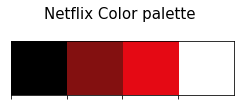

In [10]:
plt_list = ["#000000", "#831010", "#E50914", "#ffffff"]
sns.palplot(plt_list)
plt.title("Netflix Color palette ",loc='center',fontsize=15, y = 1.3)
plt.show()

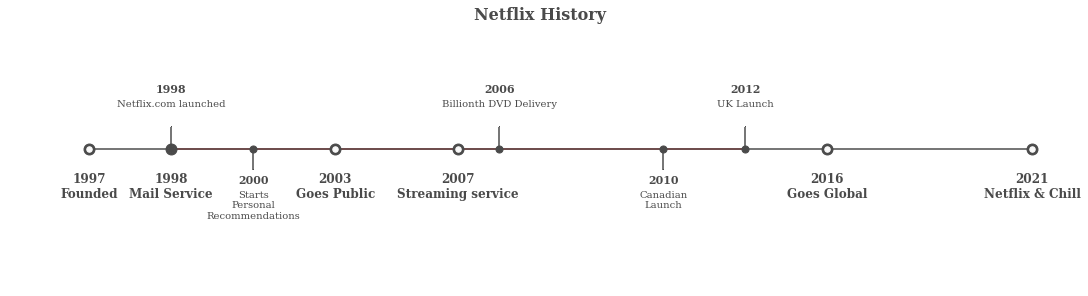

In [11]:
#lower text
tl_dates = [
    "1997\nFounded",
    "1998\nMail Service",
    "2003\nGoes Public",
    "2007\nStreaming service",
    "2016\nGoes Global",
    "2021\nNetflix & Chill"]

tl_x = [0, 1, 3, 4.5, 9,11.5]

# these go on the numbers
tl_sub_x = [1,2,5,7,8]

tl_sub_times = ["1998","2000","2006","2010","2012"]

tl_text = [
    "Netflix.com launched",
    "Starts\nPersonal\nRecommendations","Billionth DVD Delivery","Canadian\nLaunch","UK Launch"]

# Set figure & Axes
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(-1, 12)

# Timeline : line
ax.axhline(0, xmin=0.08, xmax = .96, c='#4a4a4a', zorder=1)

# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', )
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa',)

# Timeline : Time Points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a')

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.7, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a',fontsize=12)

    
# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))    
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)    
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')


# Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a' , fontsize=11)
    
    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center', 
        fontfamily='serif',color='#4a4a4a')
    
    
# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks    
ax.set_xticks([]) 
ax.set_yticks([]) 

# Title
ax.set_title("Netflix History", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')

plt.show()


In [12]:
df = data["type"].value_counts(normalize=True).mul(100).round(decimals =1).reset_index()
df.columns = ["type","perc"]
df["content"] = ["content","content"]
df["text"] = df["type"].astype(str) +" ( " + df["perc"].astype(str) + "%)"
df

,type,perc,content,text
0,Movie,69.1,content,Movie ( 69.1%)
1,TV Show,30.9,content,TV Show ( 30.9%)


In [13]:
fig = make_subplots(1,1)
trace = px.bar(df,y= "content",x= 'perc', orientation="h", barmode='stack',
             color = "type", text = "text", color_discrete_sequence =plt_list[:2],width=1000, height=400  )

fig.add_traces(trace["data"][0])
fig.add_traces(trace["data"][1])


fig.update_layout({
"plot_bgcolor": "rgba(0, 0, 0, 0)",
"paper_bgcolor": "rgba(0, 0, 0, 0)",
})
fig.update_layout(showlegend = False)
fig.update_xaxes(visible = False)
fig.update_yaxes(visible = False)

#text position
fig.update_traces(textposition='auto')
fig.update_layout(title_text ='Content Distribution' + '<br>' +  '<span style="font-size: 27px;">Netflix offers more movies compare to TV shows</span>',
    title_y = .92,barmode='stack',  margin=dict(t=120),            
    font=dict(
        family="serif",
        size=28,  # Set the font size here
    ))
fig

In [14]:
data["first_country"] = data["country"].apply(lambda x: x.split(",")[0])

In [15]:
data["genre"] = data['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

In [16]:
from sklearn.preprocessing import MultiLabelBinarizer 
df = data
test = df['genre']
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
res.head()

,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
total_row = res.sum(axis = 0).sort_values(ascending = False).to_frame().reset_index()
total_row.columns = ["genre","count"]
fig = go.Figure(data=[go.Table(header=dict(values=['<b>Genre</b>', '<b>Count</b>'],font=dict(color='black', size=13),fill_color="#E50914",line_color="#000000"),
                 cells=dict(values=[total_row.iloc[:,0],total_row.iloc[:,1]],fill_color='#ffffff',font=dict(color='black', size=12),line_color="#000000"))
                     ])
fig.show()



In [18]:
country_count = data["first_country"].value_counts().reset_index(name="count")
country_count["index"] = country_count["index"].str.lower()
country_count

,index,count
0,united states,2883
1,india,956
2,united kingdom,577
3,no data available,507
4,canada,259
...,...,...
77,zimbabwe,1
78,namibia,1
79,soviet union,1
80,iran,1


In [19]:
country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

In [20]:
#convert dict to dataframe
df_code = pd.DataFrame(country_codes.items(), columns=["country","code"])

In [21]:
data_sort = data[["first_country","year_added",]].copy()
data_sort.drop(data_sort[data_sort["year_added"]=="No Date Available"].index,inplace =True)
data_sort["year_added"] = pd.to_datetime(data_sort["year_added"],format="%Y.0")
data_sort["year_added"] = data_sort["year_added"].dt.year
data_sort = data_sort.groupby(["first_country","year_added"]).agg(count=("first_country","count")).reset_index()
data_sort.sort_values(by=["first_country","year_added"])
data_sort["cumsum"] = data_sort.groupby(["first_country"]).agg(cumcount = ("count", "cumsum"))


In [22]:
df=pd.DataFrame()
data_sort.set_index(['first_country', 'year_added'], inplace=True)
index = pd.MultiIndex.from_product(data_sort.index.levels)
df = df.reindex(index)
df = df.merge(data_sort, left_on=["first_country","year_added"],right_on=["first_country","year_added"],how ="left")
df.reset_index(inplace = True)
df.groupby(["first_country","year_added"], as_index=False).apply(lambda group: group.ffill())
df = df.fillna(0)
df["first_country"] = df["first_country"].str.lower()
df = df.merge(df_code,  left_on='first_country', right_on='country',how ="left")

In [23]:
fig = px.choropleth(df, locations="code",
                    color="cumsum",
                    hover_name="first_country",
                    color_continuous_scale=["#000000",  "#E50914"],
                    animation_frame="year_added",
                    title = "Content by Region",
                    range_color=[0,3000]
                   )

# fig["layout"].pop("updatemenus")
fig

In [24]:
#add code column to datafrmae
# df_count_code = country_count.merge(df_code,  left_on='index', right_on='country',how ="left")

In [25]:
rating_age = {
'TV-Y':'all children',
'TV-Y7':'7 and up',
'G':'General Audiences',
'TV-G':'General Audiences',
'PG':'Parental Guidance' ,
'TV-PG':'Parental Guidance',
'PG-13':'inappropriate for ages under 13',
'TV-14':'not suitable for ages under 14',
'R':'inappropriate for ages under 17',
'TV-MA':'For Mature Audiences',
'NC-17':'Inappropriate for ages 17 and under'}

data["rating_age"] = data["rating"].replace(rating_age)

In [26]:
rating_group = {'TV-Y':'Children',
'TV-Y7':'Older Children',
'G':'Children',
'TV-Y7-FV': 'Older Children',
'TV-G':'Children',
'PG':'Older Children' ,
'TV-PG':'Older Children',
'PG-13':'Teens',
'TV-14':'Teens',
'R':'Adults',
'NR': 'Adults',
'TV-MA':'Adults',
'UR':'Adults',
'NC-17':'Adults'}
data["rating_group"] = data["rating"].replace(rating_group)

In [27]:
df_count = data.groupby(["first_country"]).agg(count_content=("first_country", "count")).sort_values(by="count_content", ascending = False)
df_count.reset_index(inplace = True)
df_count.drop(df_count[df_count["first_country"]=="No Data available"].index, inplace = True)

In [28]:
first_12_country = df_count["first_country"][:12]

In [29]:
box_text = '''<b>Insight</b><br>The United States has the most content<br> on Netflix
(since Netflix is a US company),<br>
followed by India, the United Kingdom,<br> and Canada, respectively,<br>
in second through forth place.'''

fig = px.bar(df_count[:12], x ="first_country", y="count_content",color = "first_country", text = "count_content",
               color_discrete_sequence= ["#E50914"]*4 + ["#000000"]*8)
fig.update_layout({
"plot_bgcolor": "rgba(0, 0, 0, 0)",
"paper_bgcolor": "rgba(0, 0, 0, 0)",
})
fig.update_layout(title_text ='<b><span style="font-size: 27">Top 12 Countries on Netflix with The Most Content</b>' + '<br>' + '<br>' +  '<span style="font-size: 23px;">Netflix offers more movies compare to TV shows',
    title_y = .92,barmode='stack', margin=dict(t=120),   
    font=dict(
        family="serif",
        size=12,  # Set the font size here
    ))
fig.update_layout(showlegend = False)

fig.update_traces(marker=dict(line=dict(width=2,
                                        color='black')))

fig.update_xaxes(tickangle = 45, title_font_family = "serif")
#add line in y direction 
fig.update_yaxes(showline = True, linecolor = 'black', linewidth = 1, row = 1, col = 1, mirror = True)
fig.update_yaxes(title_font_family = "serif")

#move plot in the figure
fig.update_layout(margin_r = 300, legend_x = 1.3)

fig.update_traces(textposition='outside')
fig.add_annotation(text= box_text, 
                    align='center',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=1.5,
                    y=1,
#                     xanchor="right",
                    bordercolor='white',
                    borderwidth=1, font= dict(color ="black" ,size = 15),
                    bgcolor="white")
fig

In [30]:
box_text = '''<b>Insight</b><br>The United States has the most content<br> on Netflix
(since Netflix is a US company),<br>
followed by India, the United Kingdom,<br> and Canada, respectively,<br>
in second through forth place.'''

fig = px.bar(df_count[:12], y ="first_country", x="count_content",color = "first_country", text = "count_content",
               color_discrete_sequence= ["#E50914"]*4 + ["#000000"]*8)
fig.update_layout({
"plot_bgcolor": "rgba(0, 0, 0, 0)",
"paper_bgcolor": "rgba(0, 0, 0, 0)",
})
fig.update_layout(title_text ='<b><span style="font-size: 27">Top 12 Countries on Netflix with The Most Content</b>' + '<br>' + '<br>' +  '<span style="font-size: 23px;">Netflix offers more movies compare to TV shows',
    title_y = .92,barmode='stack', margin=dict(t=120),   
    font=dict(
        family="serif",
        size=12,  # Set the font size here
    ))
fig.update_layout(showlegend = False)

fig.update_traces(marker=dict(line=dict(width=2,
                                        color='black')))

fig.update_yaxes(title_font_family = "serif")
#add line in y direction 
fig.update_yaxes(showline = True, linecolor = 'black', linewidth = 1, row = 1, col = 1, mirror = True)
fig.update_xaxes(visible = False)
#move plot in the figure
fig.update_layout(margin_r = 300, legend_x = 1.3)
fig.update_traces(textposition='outside')
fig.add_annotation(text= box_text, 
                    align='center',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=1.55,
                    y=1,
#                     xanchor="right",
                    bordercolor='white',
                    borderwidth=1, font= dict(color ="black" ,size = 15),
                    bgcolor="white")

fig

In [31]:
box_text = '''<b>Insight</b><br>The United States has the most content<br> on Netflix
(since Netflix is a US company),<br>
followed by India, the United Kingdom,<br> and Canada, respectively,<br>
in second through forth place.'''

fig = px.funnel(df_count[:12], x='count_content', y='first_country', color ="first_country",color_discrete_sequence= ["#E50914"]*4 + ["#000000"]*8 )
fig.update_yaxes(title = "Country")
#add line in y direction 
fig.update_yaxes(showline = True, linecolor = 'black', linewidth = 1, row = 1, col = 1, mirror = True)
fig.update_layout(showlegend = False)
fig.update_layout({
"plot_bgcolor": "rgba(0, 0, 0, 0)",
"paper_bgcolor": "rgba(0, 0, 0, 0)",
})
fig.update_traces(marker=dict(line=dict(width=1,
                                        color='black')))

fig.update_layout(title_text ='<b><span style="font-size: 27">Top 12 Countries on Netflix with The Most Content</b>' + '<br>' + '<br>' +  '<span style="font-size: 23px;">Netflix offers more movies compare to TV shows',
    title_y = .92,barmode='stack', margin=dict(t=120),   
    font=dict(
        family="serif",
        size=12,  # Set the font size here
    ))
#move plot in the figure
fig.update_layout(margin_r = 300, legend_x = 1.3)
fig.add_annotation(text= box_text, 
                    align='center',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=1.55,
                    y=1,
#                     xanchor="right",
                    bordercolor='white',
                    borderwidth=1, font= dict(color ="black" ,size = 15),
                    bgcolor="white")




fig.show()

In [32]:
top_country = df_count["first_country"][:12]
df_contnt = data[data["first_country"].isin(top_country)].groupby(["first_country"])["type"].value_counts(normalize = True).mul(100).round(2).to_frame(name = "perc")
df_contnt.reset_index(inplace = True)
df_contnt.sort_values(by=["type","perc"], ascending= True, inplace = True)

In [33]:
box_text = '''<b>Insight</b><br>India Netflix has the<br> highest percentage of<br> Movie content.<br>
South Korea has the<br> highest TV series content<br> on Netflix.'''

fig = px.bar(df_contnt, y ="first_country", x="perc",color = "type", text = "perc",orientation="h",
               color_discrete_sequence= ["#E50914"] + ["#000000"])
fig.update_layout({
"plot_bgcolor": "rgba(0, 0, 0, 0)",
"paper_bgcolor": "rgba(0, 0, 0, 0)",
})
fig.update_layout(title_text ='<b><span style="font-size: 27">Top 12 Countries on Netflix Content Percentage</b>' + '<br>',
    title_y = .92,barmode='stack', margin=dict(t=120),   
    font=dict(
        family="serif",
        size=12,  # Set the font size here
    ))
fig.update_traces(textposition='auto',textfont=dict(
        family="serif",
#         size=18,
        color="white"))
fig.update_layout(showlegend = True)
#move plot in the figure
fig.update_layout(margin_r = 200, legend_x = 1.2)
fig.update_traces(marker=dict(line=dict(width=2,
                                        color='black')))

fig.update_yaxes(title_font_family = "serif")
#add line in y direction 
fig.update_yaxes(showline = True, linecolor = 'black', linewidth = 1, row = 1, col = 1, mirror = True)
fig.update_xaxes(visible = False)

fig.add_annotation(text= box_text, 
                    align='center',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=1.37,
                    y = .5,
#                     xanchor="right",
                    bordercolor='white',
                    borderwidth=1, font= dict(color ="black" ,size = 15),
                    bgcolor="white")
fig

In [34]:
df_rating = data.groupby("rating")["type"].value_counts().to_frame(name = "count")
df_rating.sort_values(by=["type","count"], ascending=[True,False], inplace = True)
df_rating.reset_index(inplace = True)
df_rating["relative_count"] = df_rating["count"] 
df_rating.loc[df_rating["type"]=="TV Show", "relative_count"]= -df_rating["count"]
df_rating

,rating,type,count,relative_count
0,TV-MA,Movie,1845,1845
1,TV-14,Movie,1272,1272
2,R,Movie,663,663
3,TV-PG,Movie,505,505
4,PG-13,Movie,386,386
5,PG,Movie,247,247
6,TV-Y,Movie,117,117
7,TV-G,Movie,111,111
8,TV-Y7,Movie,95,95
9,NR,Movie,79,79


In [35]:
box_text = '''<b>Insight</b><br>India Netflix has the<br> highest percentage of<br> Movie content.<br>
South Korea has the<br> highest TV series content<br> on Netflix.'''
box_legend = '''<b><span style='color:#E50914'>Movie<span style='color:black'>| TV Show </span>'''

fig = px.bar(df_rating, x="rating", y="relative_count",color = "type", text = "count",orientation="v",
               color_discrete_sequence=  ["#E50914"] + ["#000000"] )
fig.update_layout({
"plot_bgcolor": "rgba(0, 0, 0, 0)",
"paper_bgcolor": "rgba(0, 0, 0, 0)",
})
fig.update_layout(title_text ='<b><span style="font-size: 27">Rating by Content</b>' + '<br>',
    title_y = .92,barmode='relative', margin=dict(t=120),   
    font=dict(
        family="serif",
        size=12,  # Set the font size here
    ))
fig.update_traces(textposition='outside',textfont=dict(
        family="serif",
#         size=18,
        color="black"))
fig.update_layout(showlegend = True)
#move plot in the figure
fig.update_layout(margin_r = 200, legend_x = 1.15,
                 )

#change legend title
# fig.update_layout(legend=dict(
#     title=box_legend
# ))
fig.update_traces(marker=dict(line=dict(width=2,
                                        color='black')))


fig.update_yaxes(visible = False, title_font_family = "serif")
fig.update_xaxes(visible = True)

fig.add_annotation(text= box_text, 
                    align='center',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=1.3,
                    y = .5,
#                     xanchor="right",
                    bordercolor='white',
                    borderwidth=1, font= dict(color ="black" ,size = 15),
                    bgcolor="white")
fig.add_annotation(text= box_legend, 
                    align='center',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=1.27,
                    y = .77,
#                     xanchor="right",
                    bordercolor='white',
                    borderwidth=1, font= dict(color ="black" ,size = 15),
                    bgcolor="white")
fig

In [36]:
data_month = data.groupby("month_added")["type"].value_counts().to_frame(name="count").reset_index()


In [37]:
box_text = '''<b>Insight</b><br>Movie and TV Shows have<br> approximately the same<br> trend over months.<br>
'''

fig = px.area(data_month, y ="count", x="month_added",color = "type",hover_data = ["count"],
               color_discrete_sequence= ["#E50914"] + ["#000000"])

#have the same color for line and area
fig.for_each_trace(lambda trace: trace.update(fillcolor = trace.line.color))

fig.update_layout({
"plot_bgcolor": "rgba(0, 0, 0, 0)",
"paper_bgcolor": "rgba(0, 0, 0, 0)",
})
fig.update_layout(title_text ='<b><span style="font-size: 27">Content Over Time</b>' + '<br>',
    title_y = .92,barmode='stack', margin=dict(t=120),   
    font=dict(
        family="serif",
        size=12,  # Set the font size here
    ))
fig.update_layout(showlegend = True)
#move plot in the figure
fig.update_layout(margin_r = 200, legend_x = 1.2)
fig.update_traces(marker=dict(line=dict(width=2,
                                        color='black')))

fig.update_yaxes(title_font_family = "serif",title_font=dict(size=14), tickfont_size=14, )
fig.update_xaxes(visible = True)

#turn off y title
fig.update_layout(yaxis_title=None)
#move y axis to the rigth
fig.update_layout( yaxis={'side': 'right'} )
fig.add_annotation(text= box_text, 
                    align='center',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=1.37,
                    y = .5,
#                     xanchor="right",
                    bordercolor='white',
                    borderwidth=1, font= dict(color ="black" ,size = 15),
                    bgcolor="white")
fig

In [38]:
#Since the only data that is available in 2021 is the first month, I only consider years before 2021
data_year = data[data["year_added"]!=2021].groupby("year_added")["type"].value_counts().to_frame(name="count").reset_index()

In [39]:
box_text = '''<b>Insight</b><br>Netflix contents were low till 2014.<br> 2015 seems to be a game changer for Netflix.<br>
There is a steep increase in number of contents from<br> 2016 to 2019 What stands out is this drop in 2020<br> which is probably caused by COvid.  
'''

fig = px.area(data_year, y ="count", x="year_added",color = "type",hover_data = ["count"],
               color_discrete_sequence= ["#E50914"] + ["#000000"])

#have the same color for line and area
fig.for_each_trace(lambda trace: trace.update(fillcolor = trace.line.color))

fig.update_layout({
"plot_bgcolor": "rgba(0, 0, 0, 0)",
"paper_bgcolor": "rgba(0, 0, 0, 0)",
})
fig.update_layout(title_text ='<b><span style="font-size: 27">Content Over Time</b>' + '<br>',
    title_y = .92,barmode='stack', margin=dict(t=120),   
    font=dict(
        family="serif",
        size=12,  # Set the font size here
    ))
fig.update_layout(showlegend = True)
#move plot in the figure
fig.update_layout(margin_r = 400, legend_x = 1.2)
fig.update_traces(marker=dict(line=dict(width=2,
                                        color='black')))

fig.update_yaxes(title_font_family = "serif",title_font=dict(size=14), tickfont_size=14, )
fig.update_xaxes(visible = True)

#turn off y title
fig.update_layout(yaxis_title=None)
#move y axis to the rigth
fig.update_layout( yaxis={'side': 'right'} )
fig.add_annotation(text= box_text, 
                    align='center',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=1.8,
                    y = .5,
#                     xanchor="right",
                    bordercolor='white',
                    borderwidth=1, font= dict(color ="black" ,size = 15),
                    bgcolor="white")
fig

In [40]:
df_us = res.loc[data[data["country"]=="United States"].index]
df_india = res.loc[data[data["country"]=="India"].index]
df_uk = res.loc[data[data["country"]=="United Kingdom"].index]
df_canada =res.loc[ data[data["country"]=="Canada"].index]

In [41]:
us_row = df_us[df_us.columns].sum(axis = 0).sort_values(ascending = False).to_frame(name= "count").reset_index()
india_row = df_india[df_india.columns].sum(axis = 0).sort_values(ascending = False).to_frame(name= "count").reset_index()
uk_row = df_uk[df_uk.columns].sum(axis = 0).sort_values(ascending = False).to_frame(name= "count").reset_index()
canada_row = df_canada[df_canada.columns].sum(axis = 0).sort_values(ascending = False).to_frame(name= "count").reset_index()

In [42]:
fig = make_subplots(rows=1, cols=1)

list_df = [us_row, india_row, uk_row, canada_row]
visi =[]
for i,df in enumerate(list_df):
    trace = px.bar(df[:15], x='count', y="index", color ="index",text = "count",color_discrete_sequence= ["#E50914"]*4 + ["#000000"]*11 )
    for j in range(len(trace["data"])):
        fig.add_trace(trace["data"][j])
    vis = [0]*60
    vis[i*15:i*15+15] = [1]*15
    visi.append(vis)
fig.update_yaxes(title = "Genre")
fig.update_xaxes(visible = False)
fig.update_yaxes(showline = True, linecolor = 'black', linewidth = 1)
fig.update_layout(showlegend = False)



fig.update_layout({
"plot_bgcolor": "rgba(0, 0, 0, 0)",
"paper_bgcolor": "rgba(0, 0, 0, 0)",
})
fig.update_traces(marker=dict(line=dict(width=1,
                                        color='black')))

fig.update_layout(title_text ='<b><span style="font-size: 27">Top 15 genres in Countries on Netflix with The Most Content</b>' + '<br>' + '<br>' ,
    title_y = .92,barmode='stack', margin=dict(t=120),   
    font=dict(
        family="serif",
        size=12,  # Set the font size here
    ))
#move plot in the figure
fig.update_layout(margin_r = 300, legend_x = 1.3)

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="All",
                     method="update",
                     args=[{"visible":list(map(bool,[0]*60))},
                           {"title": "",
                            "annotations": []}]),
                dict(label="US",
                     method="update",
                     args=[{"visible":list(map(bool,visi[0]))},
                           {"title": "United States",
                            "annotations": []}]),
                dict(label="India",
                     method="update",
                     args=[{"visible": list(map(bool,visi[1]))},
                           {"title": "India",
                            "annotations": []}]),
                dict(label="UK",
                     method="update",
                     args=[{"visible": list(map(bool,visi[2]))},
                           {"title": "United Kingdom",
                            "annotations": []}]),
                 dict(label="Canada",
                     method="update",
                     args=[{"visible": list(map(bool,visi[3]))},
                           {"title": "Canada",
                            "annotations": []}]),
                
            ]),direction="right",
            pad={"r":30, "t": 10},
            showactive=True,
            x=0,
            xanchor="left",
            y=1.2,
            yanchor="top",
            
        )
    ])


fig

In [43]:
df_age = data[data["first_country"].isin(first_12_country)].groupby(["first_country"])["rating_group"].value_counts(normalize = True).mul(100).round(3).to_frame(name = "perc").reset_index()


In [44]:
df_age = df_age.pivot(index='rating_group', columns='first_country', values='perc')
df_age.drop('No Rating',inplace = True)
df_age.fillna(0, inplace = True)
reorderlist = ["Adults","Teens","Older Children","Children"]
df_age = df_age.reindex(reorderlist)

In [45]:
df_age

first_country,Australia,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,Turkey,United Kingdom,United States
rating_group,,,,,,,,,,,,
Adults,48.148,46.718,27.619,62.755,25.941,36.287,76.423,46.392,79.762,54.717,52.686,48.769
Teens,15.741,16.216,68.571,17.347,56.172,35.021,13.008,36.598,11.310,34.906,21.144,24.037
Older Children,22.222,22.008,3.810,11.224,16.318,27.426,8.943,12.371,5.357,9.434,18.371,19.632
Children,12.963,15.058,0.000,8.673,1.569,0.844,1.626,4.639,3.571,0.943,7.799,7.458


In [46]:
fig = px.imshow(df_age, text_auto=True, 
                color_continuous_scale=["#E50914", "#831010","#000000"])
fig.update_layout(title_text ='<b><span style="font-size: 27">Content Target Ages by Location </b>'  , 
    font=dict(
        family="serif",
        size=12,  # Set the font size here
    ))
fig.update_layout(showlegend = False)
#colorbar modification
fig.update_layout(coloraxis_colorbar=dict(
    len=.5,dtick= 20, thickness = 20
))
fig.update_xaxes(tickangle = 45, title_font_family = "serif")
#add line in y direction 
fig.update_yaxes(showline = True, linecolor = 'black', linewidth = 1, row = 1, col = 1, mirror = True)
fig.update_yaxes(title_font_family = "serif")
fig.update_xaxes(title_text = "Country",title_font_family = "serif")
#move plot in the figure
fig.update_layout(margin_r = 200, legend_x = 1.2)

fig.show()

In [47]:
df_release = data[data["first_country"].isin(first_12_country)]
df_release = df_release[(df_release["year_added"]!='No Date Available')]
df_release["year_added"] = df_release["year_added"].astype(float)
df_release["release_year"] = df_release["release_year"].astype(float)


In [48]:
df_release = df_release.groupby("first_country").agg(year_added = ("year_added","mean"),
                                        release_year = ("release_year","mean")).reset_index()
df_release["diff"] = df_release["year_added"] -df_release["release_year"]
df_release.sort_values(by="diff",inplace = True)
df_release = df_release.reset_index(drop = True)

In [49]:
# for i in range(len(df_release)):
fig = make_subplots(rows=1,cols=1)
trace1 =px.scatter(df_release,x = "year_added", y=df_release.index+1  )
trace2 = px.scatter(df_release,x = "release_year", y=df_release.index+1  )

fig.add_trace(trace1["data"][0])
fig.add_trace(trace2["data"][0])
for i in range(len(df_release)):
    # Add shapes
    fig.add_shape(type="line",
        x0=df_release["year_added"][i], y0=i+1, x1=df_release["release_year"][i], y1=i+1,
        line=dict(color="black",width=2)
    )
fig.update_traces(selector=0,marker=dict(color='#E50914',size = 14,line=dict(width=2,
                                        color='#E50914')))
fig.update_traces(selector=1,marker=dict( color='#831010',size = 14,line=dict(width=2,
                                        color='#831010')))

#move plot in the figure
fig.update_layout(margin_r = 300, legend_x = 1.2)
#add line in y direction 
fig.update_yaxes(showline = True, linecolor = 'black', linewidth = 1, row = 1, col = 1, mirror = True)
fig.update_yaxes(title_font_family = "serif")
fig.update_layout({
"plot_bgcolor": "rgba(0, 0, 0, 0)",
"paper_bgcolor": "rgba(0, 0, 0, 0)",
})

#change ytick
fig.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = df_release.index+1,
        ticktext = df_release["first_country"]
    ))
fig.update_layout(title_text ='The Gap between Released Year and Added year on Netflix( For 12 Contries With The Most Content )'  + '<br>' ,
    title_y = .92,barmode='stack',  margin=dict(t=120),            
    font=dict(
        family="serif",
        size=15,  # Set the font size here
    ))
#adding text
box_text = '''On average, Egypt and India have older <br> contents whereas Spain has <br> relatively more new contents. 
'''
fig.add_annotation(text= box_text, 
                    align='center',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=1.55,
                    y=.5,
#                     xanchor="right",
                    bordercolor='white',
                    borderwidth=1, font= dict(color ="black" ,size = 15),
                    bgcolor="white")

fig.update_layout(showlegend = True)
fig.data[0].name = 'Year Added'
fig.data[0].showlegend = True
fig.data[1].name = 'Released Year'
fig.data[1].showlegend = True
fig